In [3]:
!pip install category_encoders

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

<Axes: xlabel='OverallQual'>

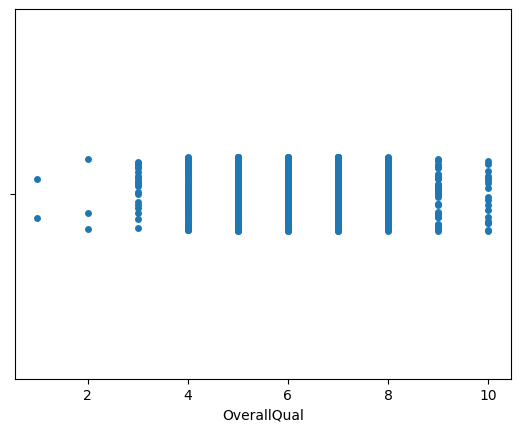

In [5]:
import seaborn as sns

sns.stripplot(x='OverallQual', data = df_train)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

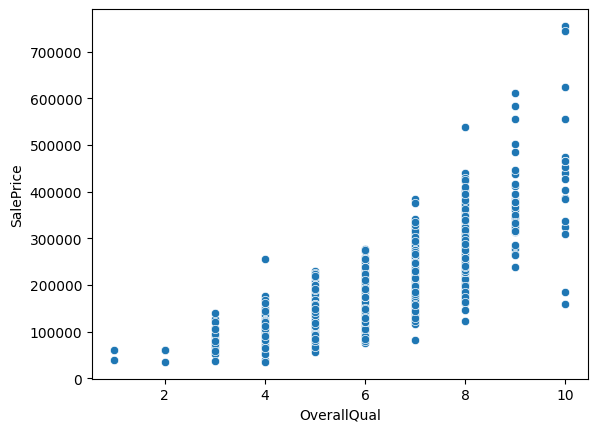

In [6]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df_train)

<Axes: xlabel='FireplaceQu'>

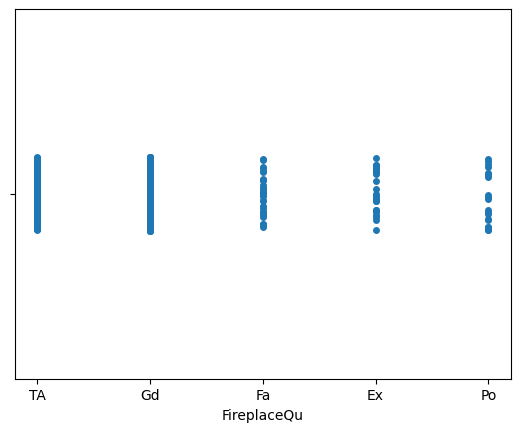

In [7]:
sns.stripplot(x='FireplaceQu', data=df_train)

<Axes: xlabel='FireplaceQu', ylabel='SalePrice'>

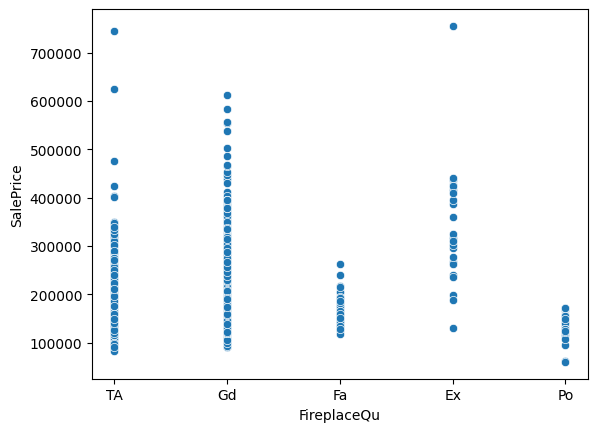

In [8]:
sns.scatterplot(x='FireplaceQu', y='SalePrice', data=df_train)

In [9]:
df_train['GrLivArea'].sort_values()

533      334
1100     438
916      480
29       520
528      605
        ... 
1169    3627
691     4316
1182    4476
523     4676
1298    5642
Name: GrLivArea, Length: 1460, dtype: int64

In [10]:
df_train = df_train[df_train['GrLivArea'] < 4600]

In [11]:
df_train = df_train[df_train['TotRmsAbvGrd'] != 14]

In [12]:
df_train = df_train[~((df_train['YearBuilt'] < 1900) & (df_train['SalePrice'] >= 400000))]

In [13]:
df_train = df_train[df_train['SalePrice'] < 700000]

In [14]:
df_train = df_train[df_train['SalePrice'] < 600000]

In [15]:
df_train.query('YearRemodAdd == 1950').shape

(178, 81)

In [16]:
# del 1950, dout?
df_train = df_train[df_train['YearRemodAdd'] != 1950]

In [17]:
df_train.query('MasVnrArea == 0').shape

(689, 81)

In [18]:
df_train = df_train[df_train['MasVnrArea'] != 1600]

In [19]:
# df_train = df_train[~((df_train['BsmtFinSF1'] == 1900) & (df_train['SalePrice'] >= 500000))]

In [20]:
df_train = df_train[df_train['LotFrontage'] < 300]

In [21]:
df_train['2ndFlrSF']

0        854
1          0
2        866
3        756
4       1053
        ... 
1455     694
1456       0
1457    1152
1458       0
1459       0
Name: 2ndFlrSF, Length: 1032, dtype: int64

In [22]:
df_train = df_train[~((df_train['BsmtFinType1'] == 'ALQ') & (df_train['SalePrice'] >= 500000))]

In [23]:
df_train.shape

(1031, 81)

In [24]:
# separete train data to X, y
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]

In [25]:
X_train.shape

(1031, 80)

In [26]:
# separate X_train in type(int, float, or object)
X_train_obj = pd.DataFrame()
X_train_int = pd.DataFrame()
X_train_flo = pd.DataFrame()

for col in X_train.columns:
    if X_train[col].dtype == "O":
        #print("object")
        X_train_obj = pd.concat([X_train_obj,X_train[col]], axis=1)
    elif X_train[col].dtype == "int64":
        #print("int64")
        X_train_int = pd.concat([X_train_int,X_train[col]], axis=1)
    else:
        #print("float64")
        X_train_flo = pd.concat([X_train_flo,X_train[col]], axis=1)


In [27]:
# set encoding function(how to chage object to int)
list_cols = X_train_obj.columns
encoding = ce.OrdinalEncoder(cols=list_cols)

In [28]:
# fit X_train_obj to encoding function
X_train_obj_ec = encoding.fit_transform(X_train_obj)
X_train_obj_ec

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,1,3,1,1,1,1,1,1,1,...,1,1,1,1,1,4,5,3,1,1
1,1,1,3,1,1,1,2,1,2,2,...,1,1,1,1,1,4,5,3,1,1
2,1,1,3,2,1,1,1,1,1,1,...,1,1,1,1,1,4,5,3,1,1
3,1,1,3,2,1,1,3,1,3,1,...,2,2,1,1,1,4,5,3,1,2
4,1,1,3,2,1,1,2,1,4,1,...,1,1,1,1,1,4,5,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,3,1,1,1,1,1,19,1,...,1,1,1,1,1,4,5,3,1,1
1456,1,1,3,1,1,1,1,1,20,1,...,1,2,1,1,1,4,1,3,1,1
1457,1,1,3,1,1,1,1,1,3,1,...,1,1,1,1,1,4,2,1,1,1
1458,1,1,3,1,1,1,1,1,11,1,...,1,2,1,1,1,4,5,3,1,1


In [29]:
X_train_coc = pd.concat([X_train_obj_ec, X_train_int, X_train_flo], axis=1)

In [30]:
import lightgbm as lgb

In [31]:
# LightGBMのモデル構築
params = {
    "objective": "regression",
    "metric": "rmse",  # RMSEを評価指標に使用
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": 0
}

In [32]:
X_train_pra, X_train_val, y_train_pra, y_train_val = train_test_split(X_train_coc, y_train, test_size=0.2)

In [33]:
train_data = lgb.Dataset(X_train_pra, label=y_train_pra)
eval_data = lgb.Dataset(X_train_val, label=y_train_val, reference=train_data)

In [34]:
model = lgb.train(params, train_data, valid_sets=[eval_data], num_boost_round=1000)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [35]:
y_pred = model.predict(X_train_val)
score = r2_score(y_train_val, y_pred)
score

0.8715887196446461

In [36]:
print(type(y_train_val))
print(type(y_pred))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [37]:
X_test_obj = pd.DataFrame()
X_test_int = pd.DataFrame()
X_test_flo = pd.DataFrame()

for col in df_test.columns:
    if df_test[col].dtype == "O":
        #print("object")
        X_test_obj = pd.concat([X_test_obj,df_test[col]], axis=1)
    elif X_train[col].dtype == "int64":
        #print("int64")
        X_test_int = pd.concat([X_test_int,df_test[col]], axis=1)
    else:
        #print("float64")
        X_test_flo = pd.concat([X_test_flo,df_test[col]], axis=1)


In [38]:
X_test_obj_ec = encoding.fit_transform(X_train_obj)
X_test_obj_ec

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,1,3,1,1,1,1,1,1,1,...,1,1,1,1,1,4,5,3,1,1
1,1,1,3,1,1,1,2,1,2,2,...,1,1,1,1,1,4,5,3,1,1
2,1,1,3,2,1,1,1,1,1,1,...,1,1,1,1,1,4,5,3,1,1
3,1,1,3,2,1,1,3,1,3,1,...,2,2,1,1,1,4,5,3,1,2
4,1,1,3,2,1,1,2,1,4,1,...,1,1,1,1,1,4,5,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,3,1,1,1,1,1,19,1,...,1,1,1,1,1,4,5,3,1,1
1456,1,1,3,1,1,1,1,1,20,1,...,1,2,1,1,1,4,1,3,1,1
1457,1,1,3,1,1,1,1,1,3,1,...,1,1,1,1,1,4,2,1,1,1
1458,1,1,3,1,1,1,1,1,11,1,...,1,2,1,1,1,4,5,3,1,1


In [39]:
X_test_coc = pd.concat([X_test_obj_ec, X_test_int, X_test_flo], axis=1)
X_test_coc

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt
0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,80.0,0.0,1961.0
1,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,81.0,108.0,1958.0
2,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,74.0,0.0,1997.0
3,1.0,1.0,3.0,2.0,1.0,1.0,3.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,78.0,20.0,1998.0
4,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,4.0,1.0,...,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,43.0,0.0,1992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.0,0.0,0.0,0.0,0.0,3.0,2006.0,50.0,0.0,1925.0
1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,0.0,0.0,0.0,0.0,10.0,2006.0,69.0,0.0,NaN
1441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,10.0,2006.0,NaN,0.0,2000.0
1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,88.0,382.0,2005.0


In [40]:
df_sorted = X_test_coc.sort_values(by='Id')
df_sorted = df_sorted.drop(df_sorted.index[1459])
df_sorted['Id']

0       1461.0
1       1462.0
2       1463.0
3       1464.0
4       1465.0
         ...  
1454    2915.0
1455    2916.0
1456    2917.0
1457    2918.0
1458    2919.0
Name: Id, Length: 1459, dtype: float64

In [41]:
y_test_pred = model.predict(df_sorted)
y_test_pred


array([134155.82322842, 171288.83459245, 188802.11386963, ...,
       174130.89491675, 129959.5934638 , 219523.18139545])

In [42]:
y_test_pred.shape

(1459,)

In [43]:
df_sorted.shape

(1459, 80)

In [48]:
submission = pd.DataFrame({'Id': df_sorted['Id'], 'SalePrice': y_test_pred})
submission.to_csv('submission_Advanced_Housing_Price_04.csv', index=False)

In [45]:
df_sorted['Id'].dtype

dtype('float64')

In [47]:
df_sorted['Id'] = df_sorted['Id'].astype('int64')